#                🎓📖📝🔎      👓📚📓📒         

# Análisis Exploratorio de Datos del dataset de la plataforma Edx

Se instalas las librerías necesarias

In [1]:
!pip install wordcloud==1.9.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Se importan las librerías que se van a utilizar

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

Se estandariza como se visualizaran los graficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (10, 5)

Se carga el dataset y se crea el dataframe que se utilizara en el análisis

In [4]:
edx = pd.read_csv('/work/edx_courses.csv')
edx

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",NaN,Self-paced on your time,Inter-American Development Bank,Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...,Intermediate,Social Sciences,English,English,4–5 hours per week,10 Weeks,FREE-Add a Verified Certificate for $25 USD,The high rates of crime and violence are two o...,NaN,https://www.edx.org/course/leaders-in-citizen-...
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,NaN,Self-paced on your time,Tsinghua University,Yuehua Nie,Introductory,Art & Culture,中文,"English, 中文",3–5 hours per week,12 Weeks,FREE-Add a Verified Certificate for $139 USD,Are you an original designer? Or a DIY fancier...,NaN,https://www.edx.org/course/pattern-studying-an...
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,"11,246",Self-paced on your time,École polytechnique fédérale de Lausanne,Wulfram Gerstner,Advanced,Biology & Life Sciences,English,English,4–6 hours per week,6 Weeks,FREE-Add a Verified Certificate for $139 USD,What happens in your brain when you make a dec...,Textbook: Neuronal Dynamics - from single neur...,https://www.edx.org/course/computational-neuro...
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,"8,775",Self-paced on your time,SDG Academy,Jeffrey D. Sachs,Introductory,Environmental Studies,English,English,1–2 hours per week,1 Weeks,FREE-Add a Verified Certificate for $25 USD,"According to the United Nations, urbanization ...",Module 1: Introduction to the SDGsProfessor Je...,https:

Se descartan columnas que no se utilizaran en el análisis

In [5]:
edx.drop(['institution','instructors','subtitles','course_effort','course_description','course_syllabus','course_url'], axis=1, inplace=True)

Se extraen los datos numéricos de las columnas de duración del curso, precio y números de inscriptos

In [6]:
patron = r'(\d+)'

edx['course_length'] = edx['course_length'].str.extract(patron)
edx['course_length'] = edx['course_length'].astype(int)

patron = r'(\d+)'

edx['price'] = edx['price'].str.extract(patron)
edx['price'] = edx['price'].astype(int)

edx['n_enrolled'] = edx['n_enrolled'].str.replace(',', '')
edx['n_enrolled'] = edx['n_enrolled'].str.replace('.', '')
edx['n_enrolled'] = edx['n_enrolled'].fillna('0')
edx['n_enrolled'] = edx['n_enrolled'].astype(int)

/tmp/ipykernel_566/3073798042.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  edx['n_enrolled'] = edx['n_enrolled'].str.replace('.', '')


Se convierten las columnas categóricas para que se comporten como si mismas

In [7]:
edx['course_type'] = edx['course_type'].astype('category')
edx['Level'] = edx['Level'].astype('category')
edx['subject'] = edx['subject'].astype('category')
edx['language'] = edx['language'].astype('category')

In [8]:
edx

,title,summary,n_enrolled,course_type,Level,subject,language,course_length,price
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,Introductory,Education & Teacher Training,English,2,49
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,Introductory,Computer Science,English,7,49
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Introductory,Computer Science,English,12,90
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Intermediate,Data Analysis & Statistics,English,13,199
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,Introductory,Computer Science,English,4,249
...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,Self-paced on your time,Intermediate,Social Sciences,English,10,25
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,Self-paced on your time,Introductory,Art & Culture,中文,12,139
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,Advanced,Biology & Life Sciences,English,6,139
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,Introductory,Environmental Studies,English,1,25


Se observan que todas las columnas hayan quedado con el tipo de dato adecuado

In [9]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   title          975 non-null    object  
 1   summary        922 non-null    object  
 2   n_enrolled     975 non-null    int64   
 3   course_type    975 non-null    category
 4   Level          975 non-null    category
 5   subject        975 non-null    category
 6   language       975 non-null    category
 7   course_length  975 non-null    int64   
 8   price          975 non-null    int64   
dtypes: category(4), int64(3), object(2)
memory usage: 43.9+ KB


Se grafica el numero de inscriptos por precio del curso

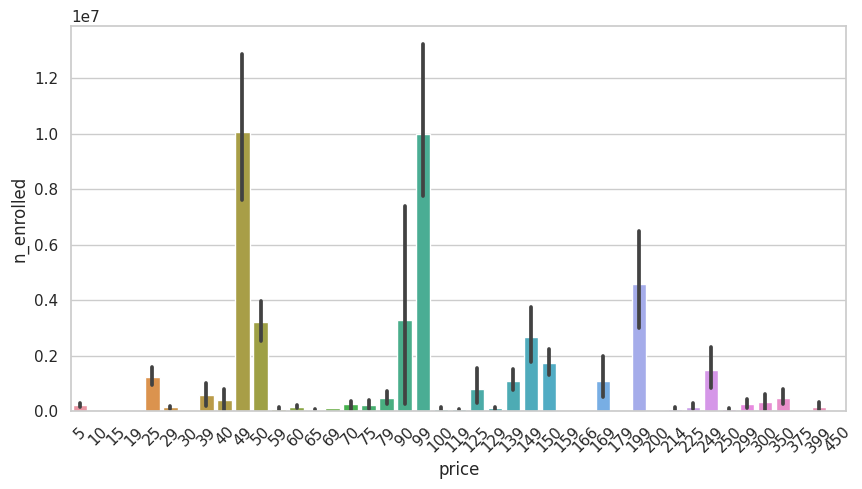

In [10]:
sns.barplot(
    data=edx,
    x='price',
    y='n_enrolled',
    estimator='sum'
    )
plt.xticks(rotation=45)
plt.show()

Se segmenta por precio en niveles bajo, medio y alto, con los mismos valores limites que se hizo con el dataset de Udemy para poder comparar

In [11]:
limites = [-1, 1, 50, 150, 500]  
segmentos = ['Free', 'Low', 'Medium', 'High']
edx['price_level'] = pd.cut(edx['price'], bins=limites, labels=segmentos)


In [12]:
edx

,title,summary,n_enrolled,course_type,Level,subject,language,course_length,price,price_level
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,Introductory,Education & Teacher Training,English,2,49,Low
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,Introductory,Computer Science,English,7,49,Low
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Introductory,Computer Science,English,12,90,Medium
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Intermediate,Data Analysis & Statistics,English,13,199,High
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,Introductory,Computer Science,English,4,249,High
...,...,...,...,...,...,...,...,...,...,...
970,Leaders in Citizen Security and Justice Manage...,"Learn about the latest in prevention, police a...",0,Self-paced on your time,Intermediate,Social Sciences,English,10,25,Low
971,Pattern Studying and Making | 图案审美与创作,Fantastic experiences in beauty and its repres...,0,Self-paced on your time,Introductory,Art & Culture,中文,12,139,Medium
972,Computational Neuroscience: Neuronal Dynamics ...,This course explains the mathematical and comp...,11246,Self-paced on your time,Advanced,Biology & Life Sciences,English,6,139,Medium
973,Cities and the Challenge of Sustainable Develo...,What is a sustainable city? Learn the basics h...,8775,Self-paced on your time,Introductory,Environmental Studies,English,1,25,Low


Se muestra la cantidad de inscriptos por nivel de precio, se nota que los cursos con nivel de precio medio son los que mas inscriptos poseen

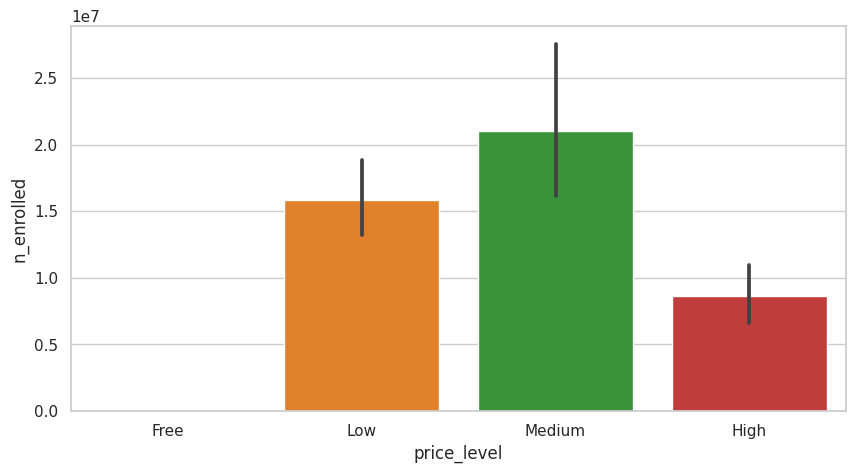

In [13]:
sns.barplot(
    data=edx,
    x='price_level',
    y='n_enrolled',
    estimator='sum'
    );

Se muestra la cantidad de inscriptos por nivel del curso, se nota que la mayoría de los inscriptos están en los cursos introductorios 

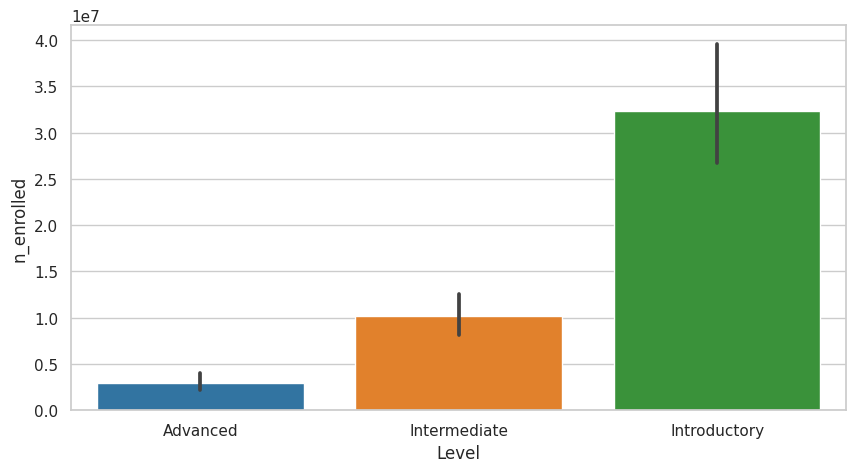

In [14]:
sns.barplot(
    data=edx,
    x='Level',
    y='n_enrolled',
    estimator='sum'
    );

Se muestra la cantidad de inscriptos en cursos por tipo, se nota claramente que los cursos asincrónicos son mucho mas elegidos que los sincrónicos.

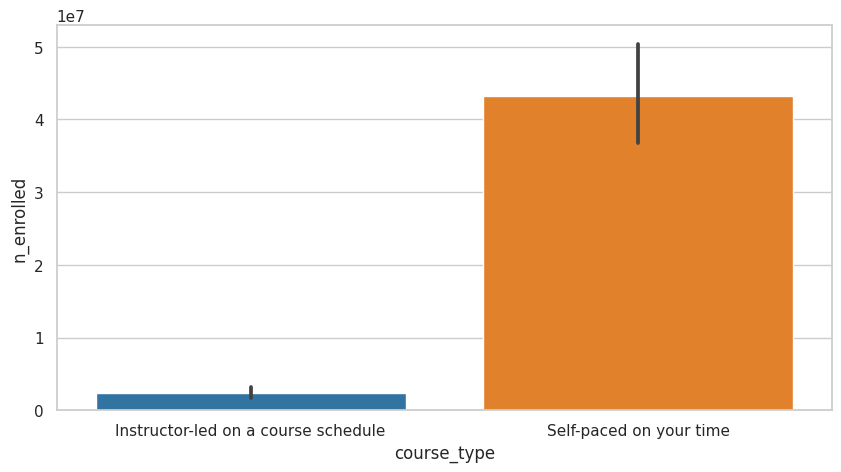

In [15]:
sns.barplot(
    data=edx,
    x='course_type',
    y='n_enrolled',
    estimator='sum'
    );

Se grafica la cantidad de inscriptos por tema de los cursos, se nota la predominancia de los cursos relacionados a la computacion, comunicación, datos, negocios y humanidades.

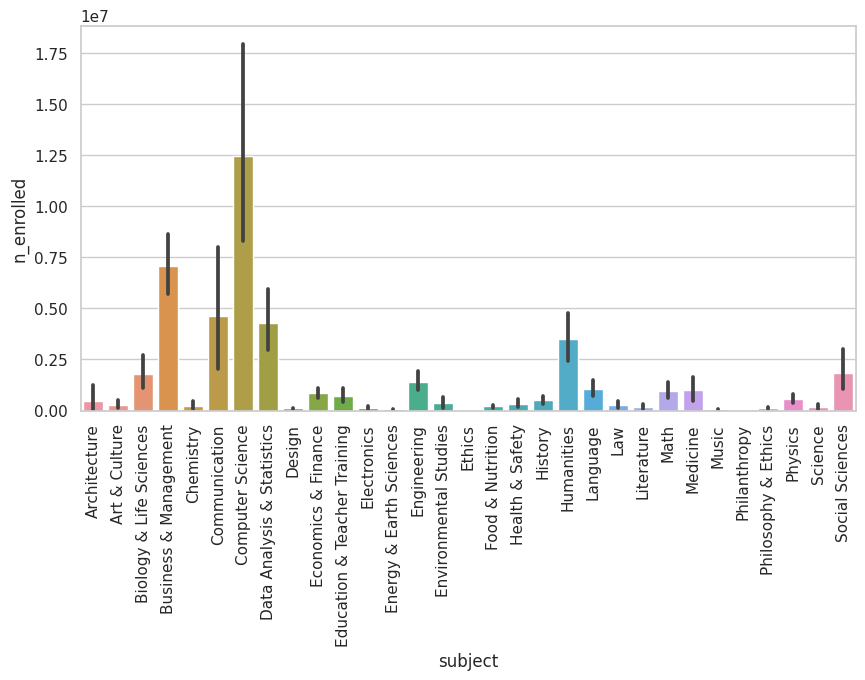

In [16]:
sns.barplot(
    data=edx,
    x='subject',
    y='n_enrolled',
    estimator='sum'
    )
plt.xticks(rotation=90)
plt.show()

Se muestra la cantidad de inscriptos por lenguaje del curso, se observa una fuerte predominancia de los inscriptos a elegir cursos en ingles.

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py

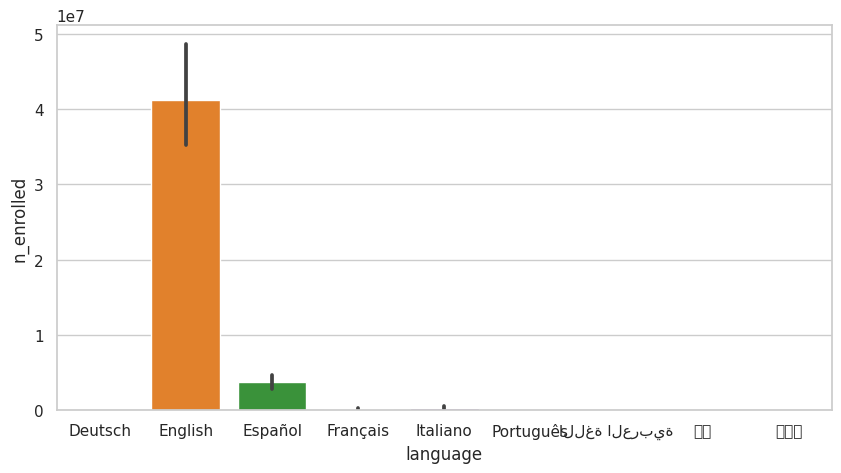

In [17]:
sns.barplot(
    data=edx,
    x='language',
    y='n_enrolled',
    estimator='sum'
    );


Se muestra la cantidad de inscriptos por duración del curso

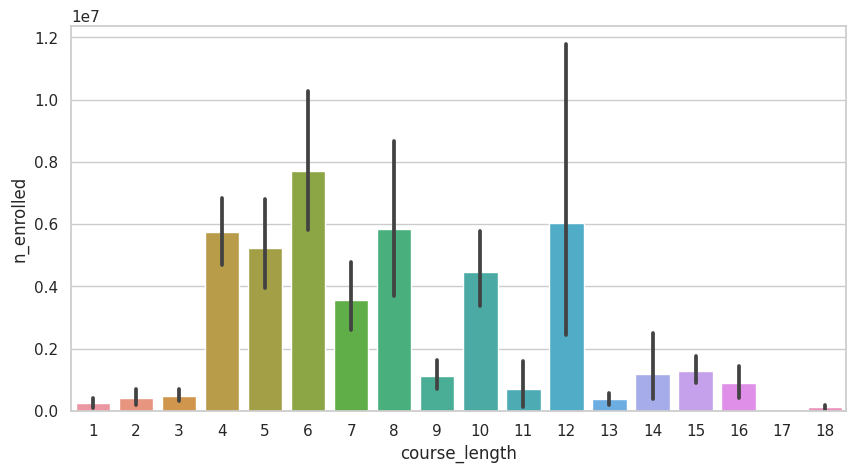

In [18]:
sns.barplot(
    data=edx,
    x='course_length',
    y='n_enrolled',
    estimator='sum'
    );

Se grafica el promedio de precio de los cursos en relación a la duración del mismo, se nota que a mayor duración mayor el costo

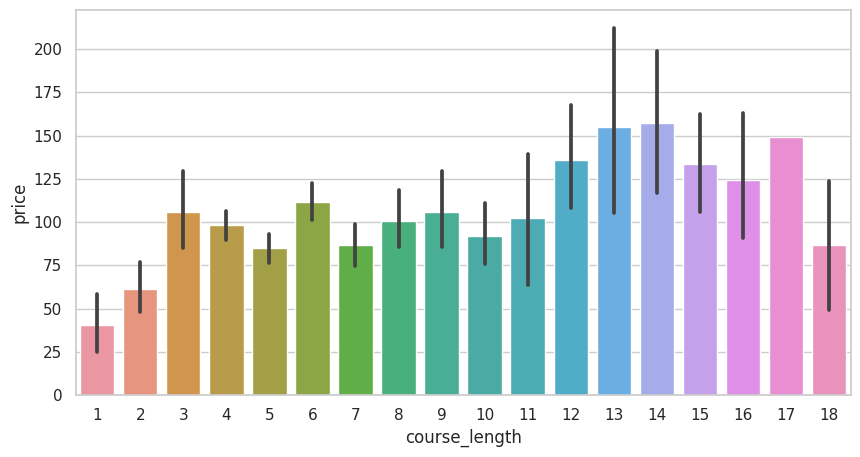

In [19]:
sns.barplot(
    data=edx,
    x='course_length',
    y='price',
    estimator='mean'
    );

Variación de la duración de los cursos de acuerdo al nivel de precios de los mismos

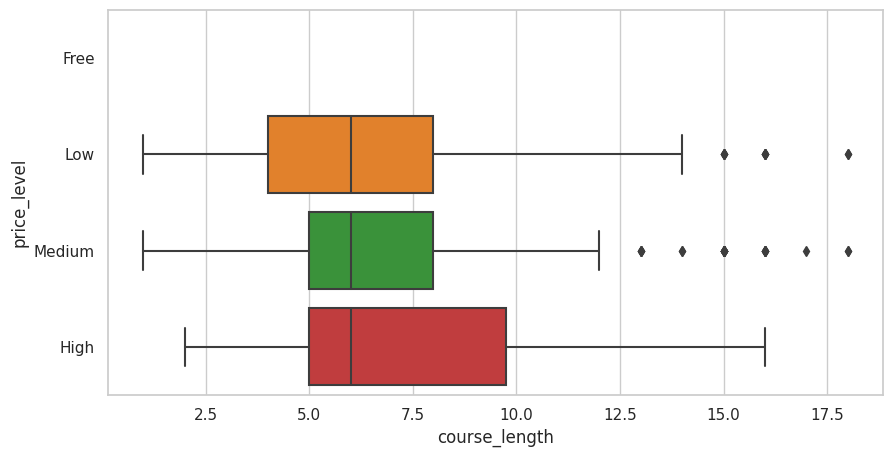

In [20]:
sns.boxplot(
    data=edx,
    x='course_length',
    y='price_level'
    );

Variación de los precios de acuerdo al nivel de los cursos, se nota que a mayor nivel se incrementa el costo del mismo

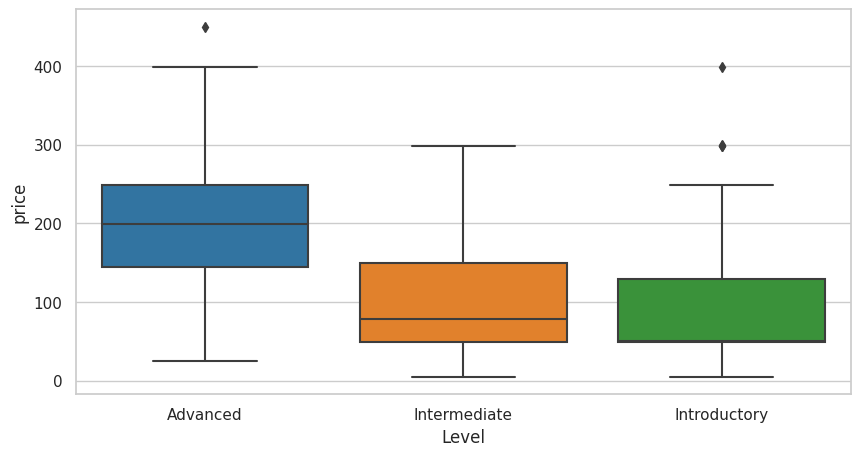

In [21]:
sns.boxplot(
    data=edx,
    x='Level',
    y='price'
    );

Se muestra el promedio de precios de los cursos de acuerdo al lenguaje

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  func(*args, **kwargs)
/shared-libs/python3.9/py

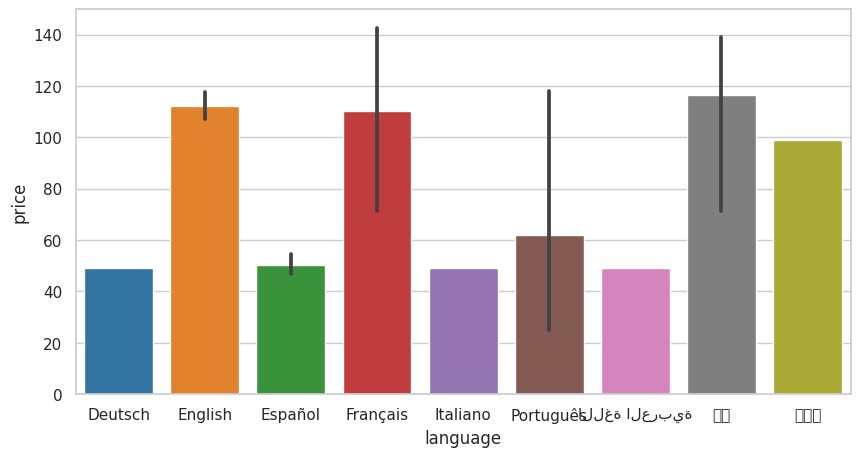

In [22]:
sns.barplot(
    data=edx,
    x='language',
    y='price'
     );

Se grafica el promedio de precios por tema de los cursos

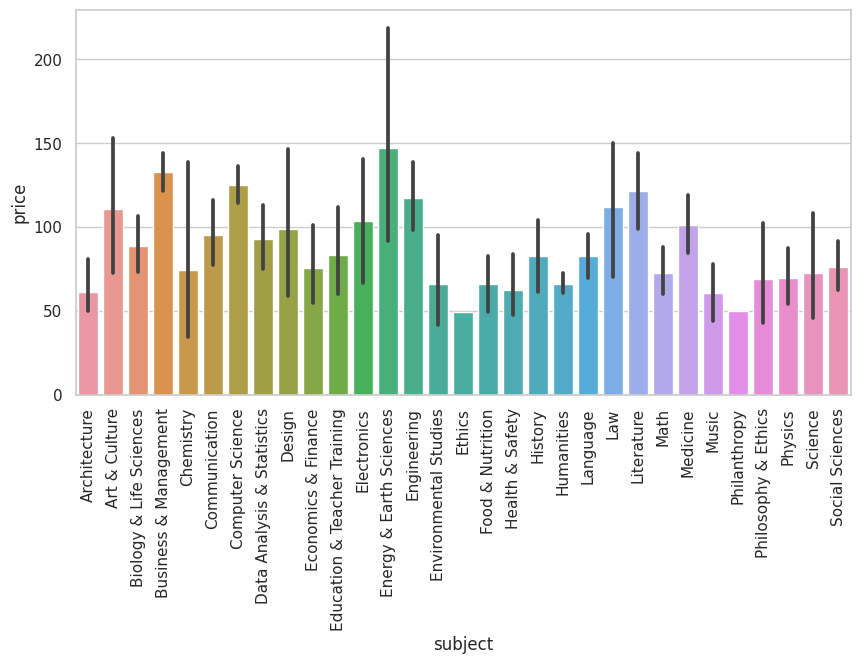

In [23]:
sns.barplot(
    data=edx,
    x='subject',
    y='price'
    )
plt.xticks(rotation=90)
plt.show()

Se muestra la variación de la duración de los cursos de acuerdo al nivel de los mismos

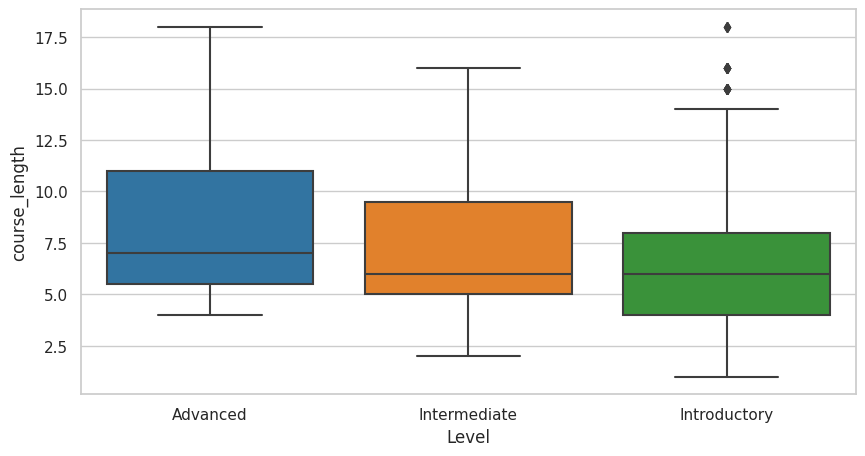

In [24]:
sns.boxplot(
    data=edx,
    x='Level',
    y='course_length'
    );

Nube de palabras del titulo de los cursos

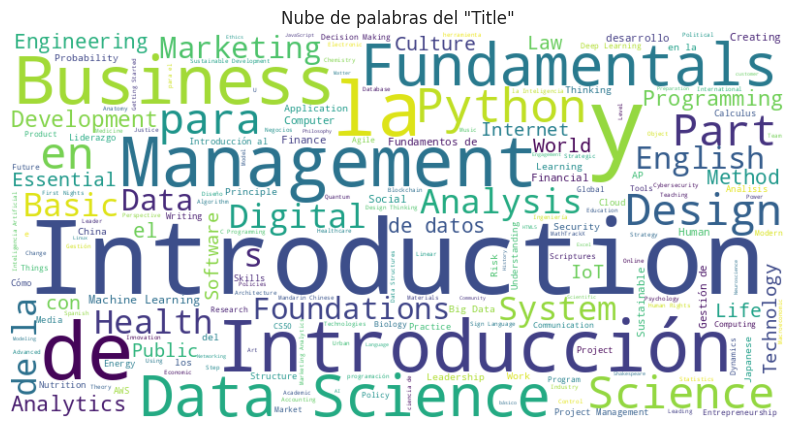

In [25]:
titulo = edx['title'].dropna().astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras del "Title"')
plt.axis('off')
plt.show()

Nube de palabras del resumen de los cursos

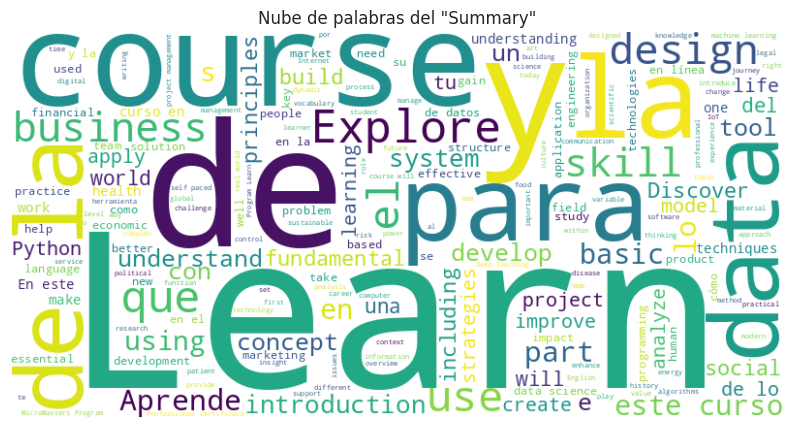

In [26]:
titulo = edx['summary'].dropna().astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras del "Summary"')
plt.axis('off')
plt.show()

Se guarda el dataset limpio para la posterior realización del tablero de control

In [27]:
edx.to_csv('edx_clean.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b76a81c6-cb65-4f6e-8146-eb08d244366b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>